In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log
from math import exp
import seaborn as sns
from scipy import stats
from scipy.integrate import solve_ivp

In [2]:
#input dataset
all_covid= pd.read_csv("Datasets/all_covid_data.csv")
all_covid
all_covid= pd.read_csv("Datasets/all_covid_data.csv")
all_covid

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
148594,2021-09-16,ZW,Zimbabwe,AFRO,266,127083,1,4551
148595,2021-09-17,ZW,Zimbabwe,AFRO,285,127368,9,4560
148596,2021-09-18,ZW,Zimbabwe,AFRO,264,127632,2,4562
148597,2021-09-19,ZW,Zimbabwe,AFRO,107,127739,1,4563


In [3]:
#filter out Turkey
all_covid= all_covid.drop(["Country_code","WHO_region","New_cases","New_deaths","Cumulative_deaths"],axis= 1,inplace= False)
covid_tur= all_covid.iloc[:,1:3]
covid_tur= covid_tur[(covid_tur.Country == "Turkey")]
covid_tur

,Country,Cumulative_cases
136686,Turkey,0
136687,Turkey,0
136688,Turkey,0
136689,Turkey,0
136690,Turkey,0
...,...,...
137308,Turkey,6738890
137309,Turkey,6767008
137310,Turkey,6794700
137311,Turkey,6820861


In [4]:
#reset index
covid_tur.index= np.arange(1, len(covid_tur) +1)
covid_tur

,Country,Cumulative_cases
1,Turkey,0
2,Turkey,0
3,Turkey,0
4,Turkey,0
5,Turkey,0
...,...,...
623,Turkey,6738890
624,Turkey,6767008
625,Turkey,6794700
626,Turkey,6820861


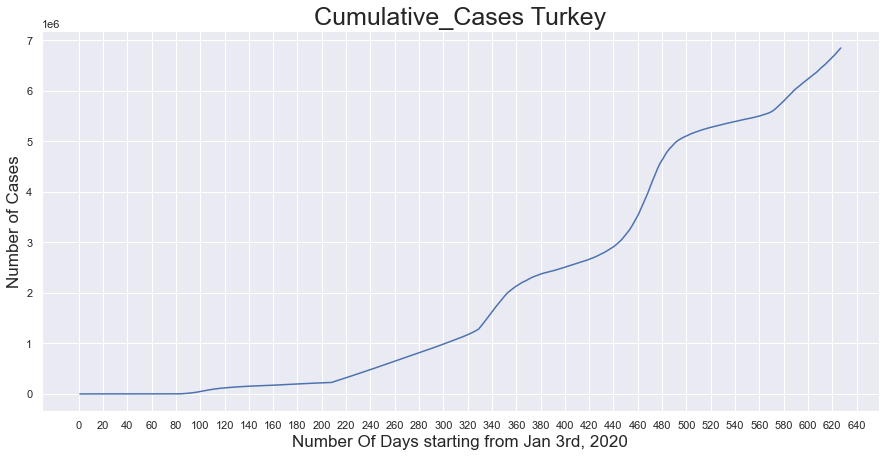

In [5]:
#ploting the cumulative cases
sns.set()
x= range(650)
plt.figure(figsize=(15,7))
plt.plot(covid_tur["Cumulative_cases"])
plt.xticks(np.arange(min(x),max(x)+1,20.0))
plt.xlabel("Number Of Days starting from Jan 3rd, 2020",size = 17)
plt.ylabel("Number of Cases",size=17)
plt.title("Cumulative_Cases Turkey", size= 25)
plt.show()

<ipython-input-10-2e6fae6c51f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tur100["Normalised_Cumulative"]= covid_tur100["Cumulative_cases"]/pop


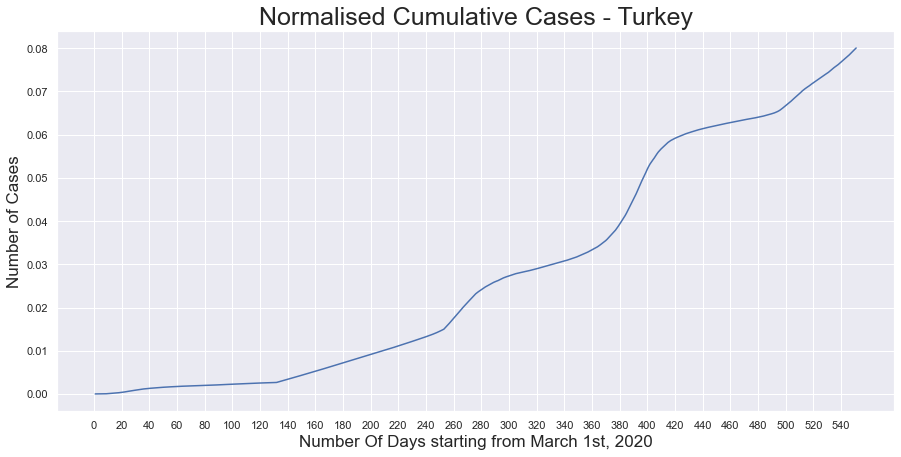

In [10]:
#Cumulative cases from 100
covid_tur100 = covid_tur[(covid_tur["Cumulative_cases"] >= 100)]
covid_tur100.index= np.arange(1, len(covid_tur100) +1)

#normalisng the data
pop= 85536088
covid_tur100["Normalised_Cumulative"]= covid_tur100["Cumulative_cases"]/pop

#ploting normalised data
x= range(560)
plt.figure(figsize=(15,7))
plt.plot(covid_tur100["Normalised_Cumulative"])
plt.xticks(np.arange(min(x),max(x)+1,20.0))
plt.xlabel("Number Of Days starting from March 1st, 2020",size = 17)
plt.ylabel("Number of Cases",size=17)
plt.title("Normalised Cumulative Cases - Turkey", size= 25)
plt.show()

<ipython-input-11-40dc53ca3cf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tur100["log"]= covid_tur100["Normalised_Cumulative"].apply(lambda x: log(x))


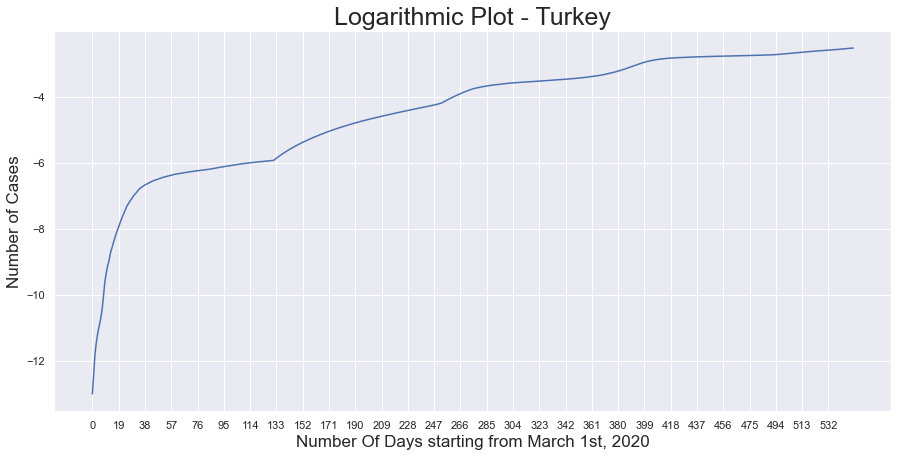

In [11]:
#log of normalised data
covid_tur100["log"]= covid_tur100["Normalised_Cumulative"].apply(lambda x: log(x))

#ploting the log data
x= range(551)
plt.figure(figsize=(15,7))
plt.plot(x, covid_tur100["log"])
plt.xticks(np.arange(min(x), max(x)+1, step= 19.0))
plt.xlabel("Number Of Days starting from March 1st, 2020",size = 17)
plt.ylabel("Number of Cases",size=17)
plt.title("Logarithmic Plot - Turkey", size= 25)
plt.show()

In [ ]:
x= range(551)
plt.figure(figsize=(15,7))
plt.plot(x, covid_tur100["log"])
plt.plot([0,16], [] )
plt.xticks(np.arange(min(x), max(x)+1, step= 19.0))
plt.xlabel("Number Of Days starting from March 1st, 2020",size = 17)
plt.ylabel("Number of Cases",size=17)
plt.title("Logarithmic Plot - Turkey", size= 25)
plt.show()

In [12]:
#getting Day column for coninience
covid_tur100["Day"]= np.arange(1, len(covid_tur100["Country"])+1)
covid_tur100

<ipython-input-12-b1a354d4c0dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tur100["Day"]= np.arange(1, len(covid_tur100["Country"])+1)


,Country,Cumulative_cases,Normalised_Cumulative,log,Day
1,Turkey,191,0.000002,-13.012175,1
2,Turkey,359,0.000004,-12.381127,2
3,Turkey,670,0.000008,-11.757171,3
4,Turkey,947,0.000011,-11.411150,4
5,Turkey,1236,0.000014,-11.144813,5
...,...,...,...,...,...
547,Turkey,6738890,0.078784,-2.541043,547
548,Turkey,6767008,0.079113,-2.536879,548
549,Turkey,6794700,0.079437,-2.532795,549
550,Turkey,6820861,0.079742,-2.528953,550


In [13]:
linest= stats.linregress(covid_tur100["Day"][0:16],covid_tur100["log"][0:16])
Emr= linest.slope
Ema= linest.intercept

In [14]:
b=0.1
a= Emr + b
r0= 0/pop
i0= covid_tur100['Normalised_Cumulative'][1] - r0
s0= 1 - i0 - r0

print(a, r0, i0, s0)


0.3912871849832207 0.0 2.2329756301223407e-06 0.9999977670243699


In [15]:
def sir(t,y,a,b):
    I= 1- y[0] -y[1]
    dydt =[- a * I * y[0],b * I]
    return dydt
y0= [s0,r0]
t= [1,covid_tur100['Day'].shape[0]]
day= covid_tur100['Day']
mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    

In [16]:
mod


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 200
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 14

In [17]:
p= 1- mod.y[0]
p

array([2.23297563e-06, 3.24814261e-06, 4.60606399e-06, 6.41364122e-06,
       8.83250158e-06, 1.20828172e-05, 1.64433048e-05, 2.32591166e-05,
       3.45385184e-05, 4.81414705e-05, 6.28549541e-05, 7.87267164e-05,
       9.70652710e-05, 1.20439898e-04, 1.52680643e-04, 1.98878318e-04,
       2.65384502e-04, 3.59811541e-04, 4.91032544e-04, 6.69181390e-04,
       9.05652721e-04, 1.21501847e-03, 1.62784927e-03, 2.16999325e-03,
       2.88541886e-03, 3.84171872e-03, 5.13010965e-03, 6.86543265e-03,
       9.18615289e-03, 1.22539549e-02, 1.62798106e-02, 2.15974064e-02,
       2.86372331e-02, 3.79196344e-02, 5.00548060e-02, 6.57427963e-02,
       8.57735055e-02, 1.10693959e-01, 1.41631734e-01, 1.79722816e-01,
       2.25317054e-01, 2.77978159e-01, 3.36483701e-01, 3.98825114e-01,
       4.62743561e-01, 5.26065283e-01, 5.86654963e-01, 6.42846238e-01,
       6.93441717e-01, 7.37712979e-01, 7.75421845e-01, 8.07144501e-01,
       8.33858033e-01, 8.56384042e-01, 8.75369636e-01, 8.91287431e-01,
      

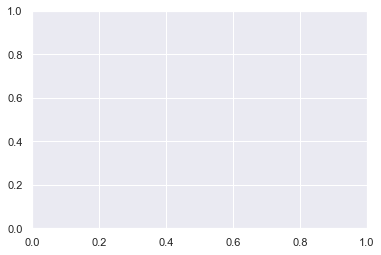

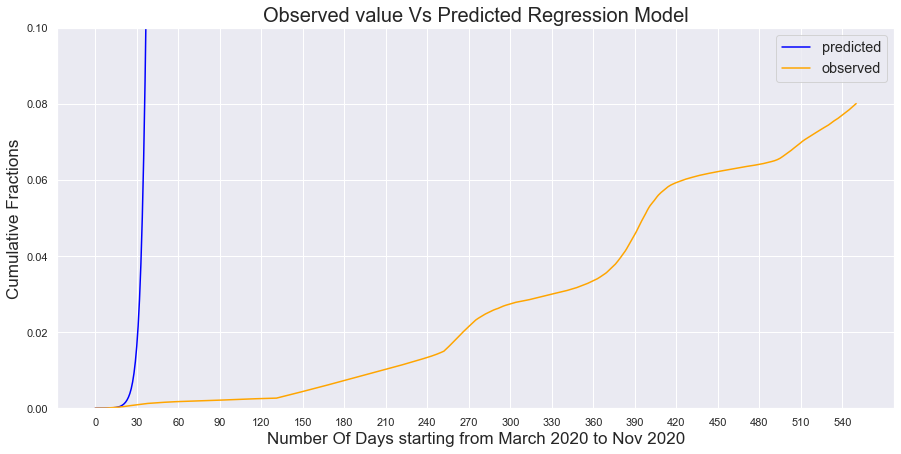

In [20]:
x= range(551)
scale_fact= 10**-1
ymin,ymax= plt.ylim()
plt.figure(figsize=(15,7))
plt.plot(x,p,color='blue',label='predicted')
plt.plot(x,covid_tur100["Normalised_Cumulative"],color='orange',label='observed')
plt.xticks(np.arange(min(x),max(x)+1,30.0))
plt.ylim(ymin*scale_fact,ymax*scale_fact)
plt.xlabel("Number Of Days starting from March 2020 to Nov 2020",size = 17)
plt.ylabel("Cumulative Fractions",size=17)
plt.title("Observed value Vs Predicted Regression Model", size= 20)
plt.legend(fontsize="large")
plt.show()


In [21]:
linest= stats.linregress(covid_tur100["Day"][16:39],covid_tur100["log"][16:39])
Emr= linest.slope
Ema= linest.intercept

In [22]:
b=0.1
a= Emr + b
r0= 0/pop
i0= covid_tur100['Normalised_Cumulative'][1] - r0
s0= 1 - i0 - r0

print(a, r0, i0, s0)


0.17342562884296303 0.0 2.2329756301223407e-06 0.9999977670243699


In [23]:
def sir(t,y,a,b):
    I= 1- y[0] -y[1]
    dydt =[- a * I * y[0],b * I]
    return dydt
y0= [s0,r0]
t= [1,covid_tur100['Day'].shape[0]]
day= covid_tur100['Day']
mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    

In [24]:
mod

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 122
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 14

In [25]:
p= 1- mod.y[0]
p

array([2.23297563e-06, 2.63480349e-06, 3.06725240e-06, 3.53263962e-06,
       4.03347607e-06, 4.57247307e-06, 5.15254233e-06, 5.78621444e-06,
       6.50189563e-06, 7.29419323e-06, 8.15648974e-06, 9.08356356e-06,
       1.00715889e-05, 1.11181360e-05, 1.22221708e-05, 1.33840551e-05,
       1.46055466e-05, 1.58897991e-05, 1.72413619e-05, 1.86661803e-05,
       2.01715957e-05, 2.17663450e-05, 2.34605613e-05, 2.52657733e-05,
       2.71949057e-05, 2.92622790e-05, 3.14836098e-05, 3.38760102e-05,
       3.64579885e-05, 3.92494487e-05, 4.22716906e-05, 4.55474101e-05,
       4.91006988e-05, 5.29570442e-05, 5.71433296e-05, 6.16878343e-05,
       6.66202335e-05, 7.19715980e-05, 7.77743948e-05, 8.40624866e-05,
       9.08711320e-05, 9.82369854e-05, 1.06198097e-04, 1.14793913e-04,
       1.24065276e-04, 1.34054424e-04, 1.44804990e-04, 1.56362004e-04,
       1.68771891e-04, 1.82082473e-04, 1.96342968e-04, 2.11603988e-04,
       2.28055689e-04, 2.46002138e-04, 2.65424814e-04, 2.86317764e-04,
      

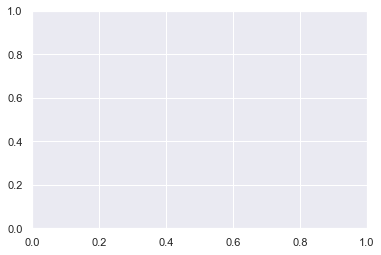

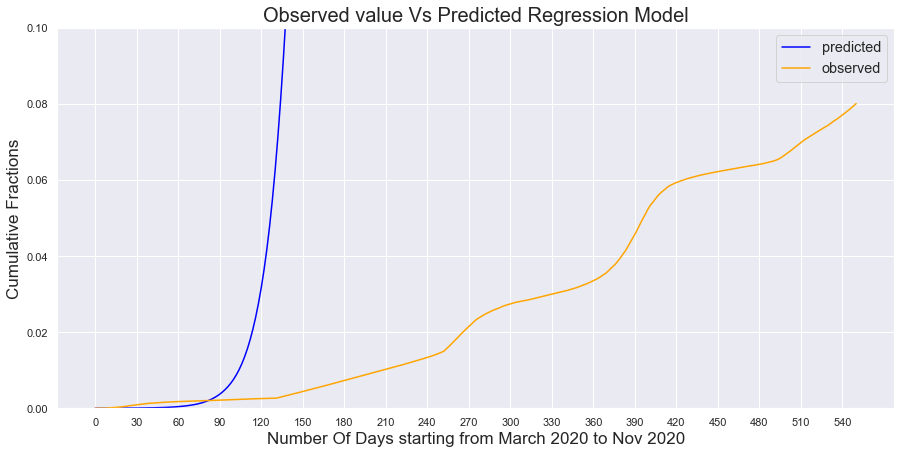

In [32]:
x= range(551)
scale_fact= 10**-1
ymin,ymax= plt.ylim()
plt.figure(figsize=(15,7))
plt.plot(x,p,color='blue',label='predicted')
plt.plot(x,covid_tur100["Normalised_Cumulative"],color='orange',label='observed')
plt.xticks(np.arange(min(x),max(x)+1,30.0))
plt.ylim(ymin*scale_fact,ymax*scale_fact)
plt.xlabel("Number Of Days starting from March 2020 to Nov 2020",size = 17)
plt.ylabel("Cumulative Fractions",size=17)
plt.title("Observed value Vs Predicted Regression Model", size= 20)
plt.legend(fontsize="large")
plt.show()


In [33]:
linest= stats.linregress(covid_tur100["Day"][39:132],covid_tur100["log"][39:132])
Emr= linest.slope
Ema= linest.intercept

In [34]:
b=0.1
a= Emr + b
r0= 0/pop
i0= covid_tur100['Normalised_Cumulative'][1] - r0
s0= 1 - i0 - r0

print(a, r0, i0, s0)


0.10708410009603021 0.0 2.2329756301223407e-06 0.9999977670243699


In [35]:
def sir(t,y,a,b):
    I= 1- y[0] -y[1]
    dydt =[- a * I * y[0],b * I]
    return dydt
y0= [s0,r0]
t= [1,covid_tur100['Day'].shape[0]]
day= covid_tur100['Day']
mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    

In [36]:
p= 1- mod.y[0]
p

array([2.23297563e-06, 2.47294019e-06, 2.71461059e-06, 2.95799896e-06,
       3.20311750e-06, 3.44997850e-06, 3.69859435e-06, 3.94897785e-06,
       4.20114253e-06, 4.45510087e-06, 4.71086538e-06, 4.96844866e-06,
       5.22786343e-06, 5.48912252e-06, 5.75223887e-06, 6.01722553e-06,
       6.28409566e-06, 6.55286254e-06, 6.82353953e-06, 7.09614014e-06,
       7.37067796e-06, 7.64716671e-06, 7.92562021e-06, 8.20605238e-06,
       8.48847728e-06, 8.77290905e-06, 9.05936196e-06, 9.34785038e-06,
       9.63838879e-06, 9.93099179e-06, 1.02256741e-05, 1.05224505e-05,
       1.08213359e-05, 1.11223454e-05, 1.14254941e-05, 1.17307972e-05,
       1.20382702e-05, 1.23479285e-05, 1.26597877e-05, 1.29738635e-05,
       1.32901716e-05, 1.36087281e-05, 1.39295489e-05, 1.42526501e-05,
       1.45780481e-05, 1.49057592e-05, 1.52357998e-05, 1.55681865e-05,
       1.59029360e-05, 1.62400652e-05, 1.65795908e-05, 1.69215300e-05,
       1.72658999e-05, 1.76127176e-05, 1.79620006e-05, 1.83137663e-05,
      

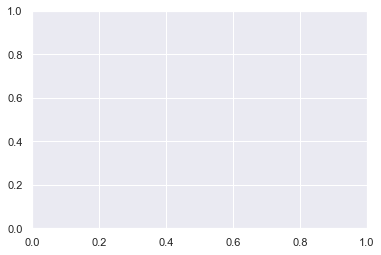

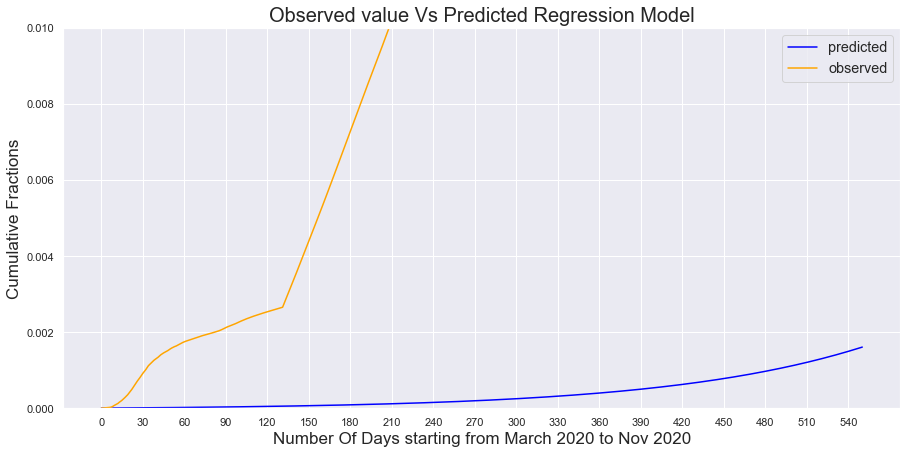

In [43]:
x= range(551)
scale_fact= 10**-2
ymin,ymax= plt.ylim()
plt.figure(figsize=(15,7))
plt.plot(x,p,color='blue',label='predicted')
plt.plot(x,covid_tur100["Normalised_Cumulative"],color='orange',label='observed')
plt.xticks(np.arange(min(x),max(x)+1,30.0))
plt.ylim(ymin*scale_fact,ymax*scale_fact)
plt.xlabel("Number Of Days starting from March 2020 to Nov 2020",size = 17)
plt.ylabel("Cumulative Fractions",size=17)
plt.title("Observed value Vs Predicted Regression Model", size= 20)
plt.legend(fontsize="large")
plt.show()


In [44]:
linest= stats.linregress(covid_tur100["Day"][0:132],covid_tur100["log"][0:132])
Emr= linest.slope
Ema= linest.intercept

In [45]:
b=0.1
a= Emr + b
r0= 0/pop
i0= covid_tur100['Normalised_Cumulative'][1] - r0
s0= 1 - i0 - r0

print(a, r0, i0, s0)


0.1282357244665685 0.0 2.2329756301223407e-06 0.9999977670243699


In [46]:
def sir(t,y,a,b):
    I= 1- y[0] -y[1]
    dydt =[- a * I * y[0],b * I]
    return dydt
y0= [s0,r0]
t= [1,covid_tur100['Day'].shape[0]]
day= covid_tur100['Day']
mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    

In [47]:
p= 1- mod.y[0]
p

array([2.23297563e-06, 2.52340311e-06, 2.82214786e-06, 3.12944776e-06,
       3.44554777e-06, 3.77070002e-06, 4.10516385e-06, 4.44929368e-06,
       4.80360185e-06, 5.16829499e-06, 5.54357260e-06, 5.92965143e-06,
       6.32676536e-06, 6.73516548e-06, 7.15512008e-06, 7.58691460e-06,
       8.03085169e-06, 8.48725119e-06, 8.95645010e-06, 9.43880263e-06,
       9.93468018e-06, 1.04444713e-05, 1.09685818e-05, 1.15074345e-05,
       1.20614697e-05, 1.26311445e-05, 1.32169337e-05, 1.38193287e-05,
       1.44388385e-05, 1.50759892e-05, 1.57313239e-05, 1.64054032e-05,
       1.70988046e-05, 1.78121229e-05, 1.85459702e-05, 1.93009756e-05,
       2.00777853e-05, 2.08770631e-05, 2.16994896e-05, 2.25457628e-05,
       2.34165977e-05, 2.43127266e-05, 2.52348989e-05, 2.61838815e-05,
       2.71604580e-05, 2.81654295e-05, 2.91996143e-05, 3.02638477e-05,
       3.13589823e-05, 3.24858879e-05, 3.36454514e-05, 3.48385770e-05,
       3.60661861e-05, 3.73292170e-05, 3.86286256e-05, 3.99653846e-05,
      

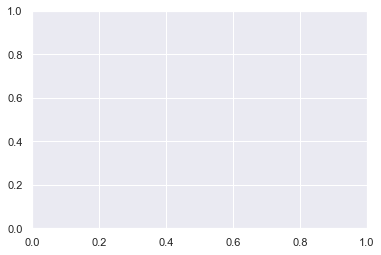

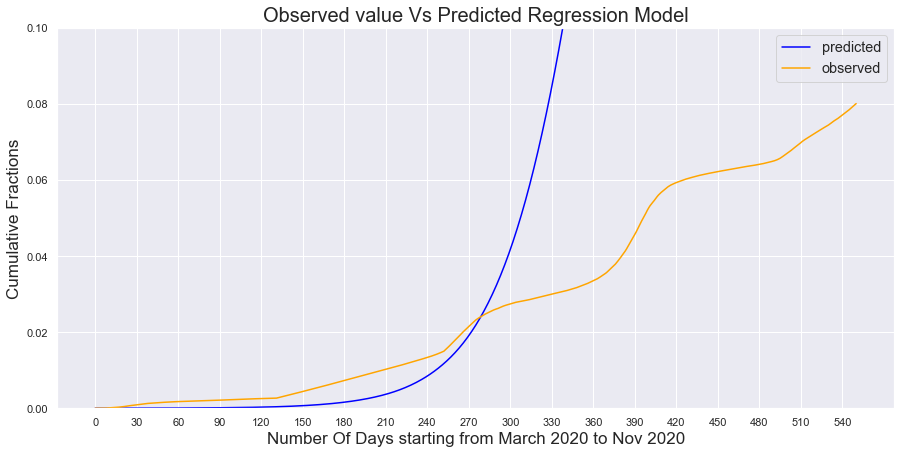

In [49]:
x= range(551)
scale_fact= 10**-1
ymin,ymax= plt.ylim()
plt.figure(figsize=(15,7))
plt.plot(x,p,color='blue',label='predicted')
plt.plot(x,covid_tur100["Normalised_Cumulative"],color='orange',label='observed')
plt.xticks(np.arange(min(x),max(x)+1,30.0))
plt.ylim(ymin*scale_fact,ymax*scale_fact)
plt.xlabel("Number Of Days starting from March 2020 to Nov 2020",size = 17)
plt.ylabel("Cumulative Fractions",size=17)
plt.title("Observed value Vs Predicted Regression Model", size= 20)
plt.legend(fontsize="large")
plt.show()


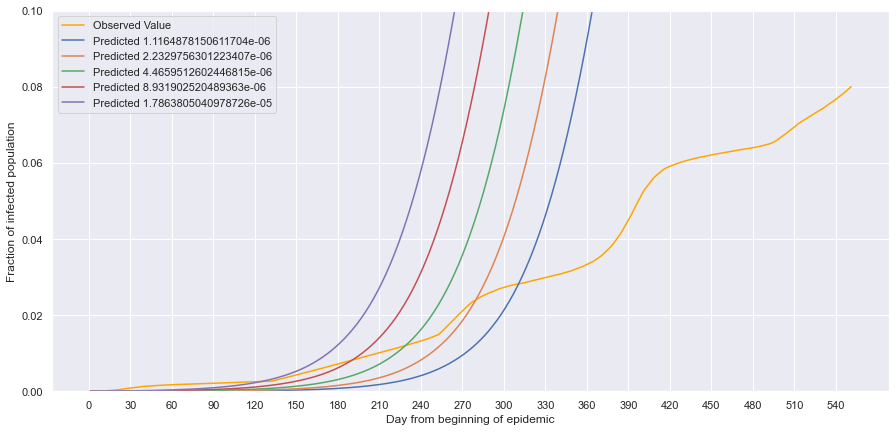

In [50]:
i00= i0 /2
scale_fact= 10**-1
plt.figure(figsize=(15,7))
plt.plot(covid_tur100["Normalised_Cumulative"],color='orange',label='Observed Value')
plt.ylim(ymin*scale_fact,ymax*scale_fact)
x= range(551)
plt.xticks(np.arange(min(x),max(x)+1,30.0))
for i in range(0,5):
    s0= 1- i00 -r0
    y0= [s0,r0]
    mod = solve_ivp(sir, t,y0, args=(a,b), t_eval= day)
    p= 1- mod.y[0]
    plt.plot(covid_tur100['Day'], p, label = ('Predicted ' + str(i00)))
    plt.xlabel('Day from beginning of epidemic')
    plt.ylabel('Fraction of infected population')
    plt.legend()
    i00 = i00 * 2
plt.show()